In [343]:
%pip install pandas statsmodels seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [344]:
# インポート
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [345]:
# JSONLファイルのパス
jsonl_file_path = './data/listings_2024_sales.json'  # ご自身のファイルパスに置き換えてください

# データをDataFrameに変換
df = pd.read_json(jsonl_file_path, lines=True)


In [346]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,stay_operation_type,prefecture_name,city_name,floor_plan,sqm,number_of_capacity,...,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,住宿,東京都,渋谷区,1R,19.00,2,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8072.677748,12576.291667,6528.581548
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,特区民泊,大阪府,大阪市港区,1DK,27.00,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5595.319149,5883.578947,5000.000000
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,住宿,東京都,大田区,1K,25.99,4,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8341.010638,11029.804054,6595.653509
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,住宿,東京都,墨田区,1K,37.24,5,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,8459.772487,13115.636364,7268.737542
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,住宿,東京都,新宿区,1R,18.55,3,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,8288.753623,10153.216216,6132.968750


In [347]:
# 統計情報

df.describe()

,sqm,number_of_capacity,location_floor,built_year,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
count,1599.000000,1599.000000,1551.000000,1598.000000,31.000000,64.000000,171.000000,1.0,2.0,31.000000,50.000000,1599.000000,1599.000000,1599.000000
mean,27.255066,3.255159,3.703417,2014.397372,1.483871,1.375000,1.105263,1.0,1.0,1.322581,1.040000,9569.396606,11888.186557,7308.135433
std,11.365421,1.440496,2.160880,14.598030,0.676805,0.519462,0.447905,NaN,0.0,0.475191,0.197949,3948.880015,5857.820130,2631.249355
min,10.710000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,4917.394487,4734.975610,2105.238095
25%,20.130000,2.000000,2.000000,2014.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,7225.552140,8312.126603,5917.189347
50%,25.450000,3.000000,3.000000,2022.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,8565.012195,10755.725000,6738.402878
75%,30.180000,4.000000,5.000000,2023.000000,2.000000,2.000000,1.000000,1.0,1.0,2.000000,1.000000,10278.724820,13285.633784,7798.802494
max,106.100000,12.000000,19.000000,2024.000000,4.000000,3.000000,4.000000,1.0,1.0,2.000000,2.000000,45828.060000,67264.141593,31972.223350


In [348]:
# 欠損値の数
df.isnull().sum()


manual_id                 0
listing_name              0
room_type_id              0
owner_name                0
stay_operation_type       0
prefecture_name           0
city_name                 0
floor_plan                0
sqm                       0
number_of_capacity        0
has_elevator           1320
has_auto_lock          1325
first_line                1
first_station             1
first_walk_min            1
location_floor           48
built_year                1
tag                       0
number_of_s_beds       1568
number_of_sd_beds      1535
number_of_d_beds       1428
number_of_q_beds       1598
number_of_k_beds       1597
number_of_futons       1568
number_of_sofa_beds    1549
total_adr                 0
minpaku_adr               0
monthly_adr               0
dtype: int64

In [349]:
# ダミー変数の追加

df = pd.get_dummies(df, columns=[
    'stay_operation_type',
    'prefecture_name',
    'city_name',
    'floor_plan',
    'tag',
    'first_station',
    'first_line',
], drop_first=True)

df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_都営地下鉄大江戸線,first_line_都営大江戸線,first_line_都営大江戸線・東京メトロ副都心線,first_line_都営新宿線,first_line_都営浅草線,first_line_都電荒川線,first_line_阪急電鉄神戸線,first_line_阪神なんば線,first_line_阪神電鉄阪神なんば線,first_line_ＪＲ中央線
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,無,無,8,4.0,...,False,False,False,False,False,False,False,False,False,False
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,27.00,4,None,None,10,1.0,...,False,False,False,False,False,False,False,False,False,False
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,有,有,5,4.0,...,False,False,False,False,False,False,False,False,False,False
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,有,有,4,5.0,...,False,True,False,False,False,False,False,False,False,False
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,無,無,3,2.0,...,False,False,False,False,False,False,False,False,False,False


In [350]:
# 欠損値の処理

df['number_of_s_beds'].fillna(0, inplace=True)
df['number_of_sd_beds'].fillna(0, inplace=True)
df['number_of_d_beds'].fillna(0, inplace=True)
df['number_of_q_beds'].fillna(0, inplace=True)
df['number_of_k_beds'].fillna(0, inplace=True)
df['number_of_futons'].fillna(0, inplace=True)
df['number_of_sofa_beds'].fillna(0, inplace=True)

df['first_walk_min'] = pd.to_numeric(df['first_walk_min'], errors='coerce')

df['has_elevator'] = df['has_elevator'].map({'有': 1, '無': 0})
df['has_elevator'].fillna(0.5, inplace=True)

df['has_auto_lock'] = df['has_auto_lock'].map({'有': 1, '無': 0})
df['has_auto_lock'].fillna(0.5, inplace=True)

df = df.dropna()

df.isnull().sum()

/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_43161/10565926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_s_beds'].fillna(0, inplace=True)
/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_43161/10565926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

manual_id                0
listing_name             0
room_type_id             0
owner_name               0
sqm                      0
                        ..
first_line_都電荒川線         0
first_line_阪急電鉄神戸線       0
first_line_阪神なんば線        0
first_line_阪神電鉄阪神なんば線    0
first_line_ＪＲ中央線         0
Length: 265, dtype: int64

In [351]:
# built_yearは築年数に変換

df['built_year'] = 2024 - df['built_year']

In [352]:
# floor_planの変換

# 1Rから始まるものはfloor_plan_group_1Rにまとめる
df['floor_plan_group_1R'] = df[[column for column in df.columns if column.startswith('floor_plan_1R')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1R')], axis=1, inplace=True)

# floor_plan_1DK+Sとfloor_plan_1DKSはfloor_plan_1SDKにまとめる
df['floor_plan_1SDK'] = df[['floor_plan_1DKS', 'floor_plan_1DK+S', 'floor_plan_1DKS']].any(axis=1).astype(int)
df.drop(['floor_plan_1DK+S', 'floor_plan_1DKS'], axis=1, inplace=True)

# 1Kから始まるものはfloor_plan_group_1Kにまとめる
df['floor_plan_group_1K'] = df[[column for column in df.columns if column.startswith('floor_plan_1K')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1K')], axis=1, inplace=True)

# floor_plan_２LDKはfloor_plan_2LDKにまとめる
df['floor_plan_2LDK'] = df[['floor_plan_２LDK', 'floor_plan_2LDK']].any(axis=1).astype(int)
df.drop(['floor_plan_２LDK'], axis=1, inplace=True)

# データがないカラムを一部削除
df.drop(["floor_plan_4DK", "floor_plan_4LDK", "floor_plan_戸建"], axis=1, inplace=True)

In [353]:
# 寝具関連の変換

# number_of_sd_bedsは>0かどうかでbooleanに変換
df['has_sd_bed'] = (df['number_of_sd_beds'] > 0).astype(int)
df.drop('number_of_sd_beds', axis=1, inplace=True)

df['has_d_bed'] = (df['number_of_d_beds'] > 0).astype(int)
df.drop('number_of_d_beds', axis=1, inplace=True)

df['has_q_bed'] = (df['number_of_q_beds'] > 0).astype(int)
df.drop('number_of_q_beds', axis=1, inplace=True)

df['has_k_bed'] = (df['number_of_k_beds'] > 0).astype(int)
df.drop('number_of_k_beds', axis=1, inplace=True)

df['has_futon'] = (df['number_of_futons'] > 0).astype(int)
df.drop('number_of_futons', axis=1, inplace=True)

df['has_sofa_bed'] = (df['number_of_sofa_beds'] > 0).astype(int)
df.drop('number_of_sofa_beds', axis=1, inplace=True)



In [354]:
# first_lineの変換

# first_line_東京メトロ 丸ノ内線とfirst_line_東京メトロ丸の内線とfirst_line_東京メトロ丸ノ内線はfirst_line_東京メトロ丸の内線にまとめる
df['first_line_東京メトロ丸の内線'] = df[['first_line_東京メトロ 丸ノ内線', 'first_line_東京メトロ丸の内線', 'first_line_東京メトロ丸ノ内線']].any(axis=1).astype(int)
df.drop(['first_line_東京メトロ 丸ノ内線', 'first_line_東京メトロ丸ノ内線'], axis=1, inplace=True)

# first_line_東京メトロ半蔵門線・都営浅草線・京成押上線・東武スカイツリーラインはfirst_line_東京メトロ半蔵門線にまとめる
df['first_line_東京メトロ半蔵門線'] = df[['first_line_東京メトロ半蔵門線・都営浅草線・京成押上線・東武スカイツリーライン', 'first_line_東京メトロ半蔵門線']].any(axis=1).astype(int)
df.drop('first_line_東京メトロ半蔵門線・都営浅草線・京成押上線・東武スカイツリーライン', axis=1, inplace=True)

# first_line_都営大江戸線・東京メトロ副都心線はfirst_line_都営大江戸線にまとめる
df['first_line_都営大江戸線'] = df[['first_line_都営大江戸線・東京メトロ副都心線', 'first_line_都営大江戸線']].any(axis=1).astype(int)
df.drop('first_line_都営大江戸線・東京メトロ副都心線', axis=1, inplace=True)


In [355]:
# location_floorの変換

# location_floorは1階かどうかでbooleanに変換
df['is_first_floor'] = (df['location_floor'] == 1).astype(int)
df.drop('location_floor', axis=1, inplace=True)



In [356]:
# city_nameを変換

# city_nameで始まるもののうち、city_name_大阪市から始まるものはまとめる: いずれかのcity_nameの部分がtrueならば、city_name_大阪市もtrue
df['city_name_大阪市'] = df[[col for col in df.columns if col.startswith('city_name_大阪市')]].any(axis=1)
df.drop([col for col in df.columns if col.startswith('city_name_大阪市') and col != 'city_name_大阪市'], axis=1, inplace=True)

array([[<Axes: xlabel='sqm', ylabel='sqm'>,
        <Axes: xlabel='number_of_capacity', ylabel='sqm'>,
        <Axes: xlabel='has_elevator', ylabel='sqm'>,
        <Axes: xlabel='has_auto_lock', ylabel='sqm'>,
        <Axes: xlabel='first_walk_min', ylabel='sqm'>,
        <Axes: xlabel='is_first_floor', ylabel='sqm'>,
        <Axes: xlabel='built_year', ylabel='sqm'>,
        <Axes: xlabel='total_adr', ylabel='sqm'>],
       [<Axes: xlabel='sqm', ylabel='number_of_capacity'>,
        <Axes: xlabel='number_of_capacity', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_elevator', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_auto_lock', ylabel='number_of_capacity'>,
        <Axes: xlabel='first_walk_min', ylabel='number_of_capacity'>,
        <Axes: xlabel='is_first_floor', ylabel='number_of_capacity'>,
        <Axes: xlabel='built_year', ylabel='number_of_capacity'>,
        <Axes: xlabel='total_adr', ylabel='number_of_capacity'>],
       [<Axes: xlabel='sqm', ylabel=

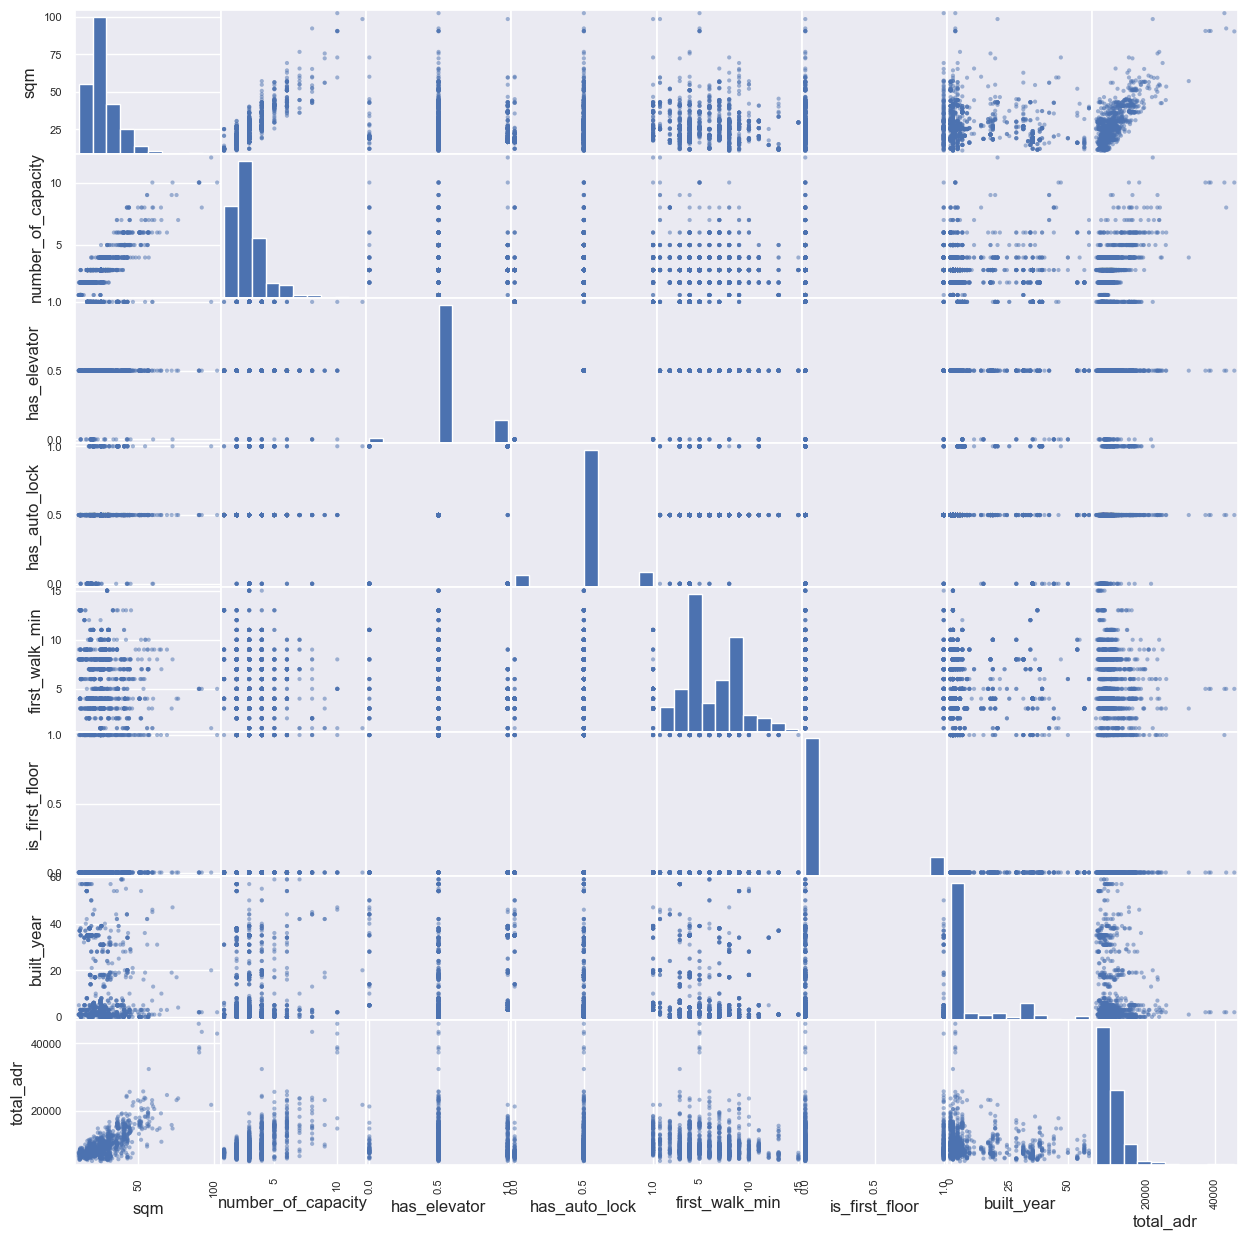

In [357]:
from pandas import plotting

plotting.scatter_matrix(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "is_first_floor",
        "built_year",
        "total_adr",
    ]],
    figsize=(15, 15),
)

<Axes: >

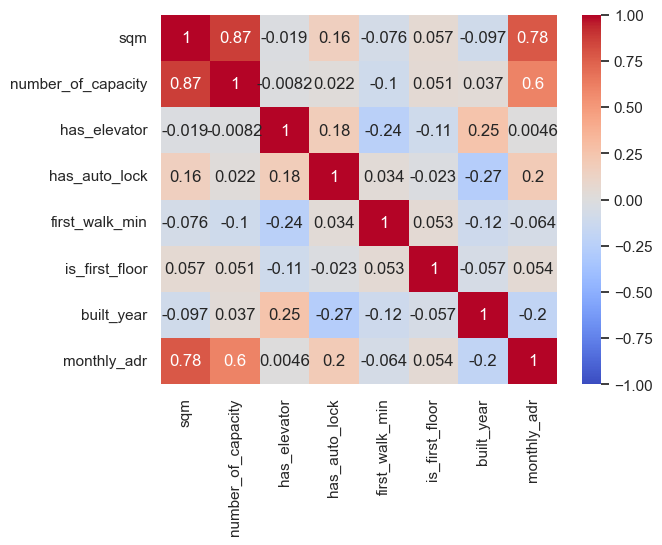

In [358]:
sns.heatmap(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "is_first_floor",
        "built_year",
        "monthly_adr",
    ]].corr(),
    vmin=-1, annot=True, cmap='coolwarm')

In [359]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,built_year,...,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,is_first_floor,city_name_大阪市
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,0.0,0.0,8.0,28.0,...,1,0,0,1,0,0,0,0,0,False
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,27.00,4,0.5,0.5,10.0,28.0,...,0,0,0,0,0,0,0,0,1,True
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,1.0,1.0,5.0,39.0,...,0,1,0,1,0,0,0,0,0,False
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,1.0,1.0,4.0,25.0,...,0,1,1,0,0,0,0,0,0,False
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,0.0,0.0,3.0,14.0,...,1,0,0,0,0,0,1,0,0,False


In [360]:
# 統計情報

df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,built_year,number_of_s_beds,total_adr,minpaku_adr,monthly_adr,...,first_line_都営大江戸線,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,is_first_floor
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,...,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,27.014061,3.225389,0.554404,0.510039,6.071244,9.052461,0.029145,9457.487292,11739.696311,7258.860159,...,0.099093,0.244171,0.398964,0.040155,0.100389,0.000648,0.000648,0.017487,0.027202,0.120466
std,10.744551,1.363720,0.198716,0.203811,2.714327,13.920493,0.227256,3790.940249,5657.358300,2579.008773,...,0.298884,0.429734,0.489844,0.196387,0.300615,0.025449,0.025449,0.131120,0.162725,0.325612
min,10.710000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4917.394487,4734.975610,2105.238095,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.157500,2.000000,0.500000,0.500000,4.000000,1.000000,0.000000,7209.448902,8270.871737,5897.843327,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.450000,3.000000,0.500000,0.500000,6.000000,2.000000,0.000000,8501.971295,10658.066728,6732.059099,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.180000,4.000000,0.500000,0.500000,8.000000,7.000000,0.000000,10193.919311,13233.378971,7753.282791,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.400000,12.000000,1.000000,1.000000,15.000000,59.000000,4.000000,45828.060000,67264.141593,31972.223350,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [361]:
# 説明変数の定義
features = [
    'number_of_capacity',
    'has_elevator',
    'has_auto_lock',
    'is_first_floor',
    'built_year',
    'has_sd_bed',
    'has_d_bed',
    'has_q_bed',
    'has_k_bed',
    'has_futon',
    'has_sofa_bed',
    'first_walk_min',
]

features += [col for col in df.columns if col.startswith('stay_operation_type_')]

features += [col for col in df.columns if col.startswith('prefecture_name')]

features += [col for col in df.columns if col.startswith('city_name')]

features += [col for col in df.columns if col.startswith('floor_plan')]

features += [col for col in df.columns if col.startswith('first_line')]

# features += [col for col in df.columns if col.startswith('first_station')]

X = df[features].astype(float)

features

['number_of_capacity',
 'has_elevator',
 'has_auto_lock',
 'is_first_floor',
 'built_year',
 'has_sd_bed',
 'has_d_bed',
 'has_q_bed',
 'has_k_bed',
 'has_futon',
 'has_sofa_bed',
 'first_walk_min',
 'stay_operation_type_旅館業',
 'stay_operation_type_特区民泊',
 'prefecture_name_東京都',
 'city_name_世田谷区',
 'city_name_中野区',
 'city_name_北区',
 'city_name_台東区',
 'city_name_品川区',
 'city_name_墨田区',
 'city_name_大田区',
 'city_name_文京区',
 'city_name_新宿区',
 'city_name_杉並区',
 'city_name_板橋区',
 'city_name_江戸川区',
 'city_name_渋谷区',
 'city_name_港区',
 'city_name_葛飾区',
 'city_name_豊島区',
 'city_name_大阪市',
 'floor_plan_1LDK',
 'floor_plan_1LDL',
 'floor_plan_1SDK',
 'floor_plan_1SK',
 'floor_plan_1SLDK',
 'floor_plan_2DK',
 'floor_plan_2K',
 'floor_plan_2LDK',
 'floor_plan_3DK',
 'floor_plan_3LDK',
 'floor_plan_group_1R',
 'floor_plan_group_1K',
 'first_line_JR中央本線',
 'first_line_JR中央線',
 'first_line_JR京浜東北線',
 'first_line_JR大阪環状線',
 'first_line_JR山手線',
 'first_line_JR東西線',
 'first_line_JR湘南新宿ライン',
 'first_line_J

In [362]:
# 相関係数を確認
cor = df[features].corr()

cor


,number_of_capacity,has_elevator,has_auto_lock,is_first_floor,built_year,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,...,first_line_都営三田線,first_line_都営地下鉄大江戸線,first_line_都営大江戸線,first_line_都営新宿線,first_line_都営浅草線,first_line_都電荒川線,first_line_阪急電鉄神戸線,first_line_阪神なんば線,first_line_阪神電鉄阪神なんば線,first_line_ＪＲ中央線
number_of_capacity,1.000000,-0.008209,0.022167,0.051197,0.037101,0.079919,0.082308,-0.022883,0.014465,-0.007559,...,-0.080970,-0.007295,-0.021441,0.149571,0.059982,0.041006,0.047650,-0.008426,0.007254,-0.022883
has_elevator,-0.008209,1.000000,0.182531,-0.106363,0.252114,0.325942,0.423843,-0.071048,0.057104,-0.247960,...,0.197372,-0.012084,0.001922,-0.050101,0.184181,-0.087882,-0.013958,-0.013958,-0.009863,-0.006972
has_auto_lock,0.022167,0.182531,1.000000,-0.023118,-0.272245,-0.333913,0.311453,0.061220,0.061220,-0.018699,...,0.213267,-0.002174,0.036854,-0.009014,0.234704,-0.069971,-0.002511,-0.002511,-0.001774,-0.001254
is_first_floor,0.051197,-0.106363,-0.023118,1.000000,-0.056586,-0.035157,-0.050798,-0.009422,-0.009422,0.041705,...,-0.035402,-0.016329,0.043743,-0.011502,-0.093695,-0.026709,-0.018861,-0.018861,-0.013328,-0.009422
built_year,0.037101,0.252114,-0.272245,-0.056586,1.000000,0.358381,0.256600,-0.007413,0.054785,0.150401,...,-0.013617,-0.028702,-0.133497,-0.102177,-0.066487,0.025010,0.084041,-0.033153,-0.007900,0.014539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
first_line_都電荒川線,0.041006,-0.087882,-0.069971,-0.026709,0.025010,0.123089,-0.024108,-0.001837,-0.001837,0.128017,...,-0.006903,-0.003184,-0.023935,-0.013203,-0.018271,1.000000,-0.003678,-0.003678,-0.002599,-0.001837
first_line_阪急電鉄神戸線,0.047650,-0.013958,-0.002511,-0.018861,0.084041,-0.010424,-0.017025,-0.001297,-0.001297,-0.006799,...,-0.004875,-0.002249,-0.016903,-0.009324,-0.012903,-0.003678,1.000000,-0.002597,-0.001835,-0.001297
first_line_阪神なんば線,-0.008426,-0.013958,-0.002511,-0.018861,-0.033153,-0.010424,-0.017025,-0.001297,-0.001297,-0.006799,...,-0.004875,-0.002249,-0.016903,-0.009324,-0.012903,-0.003678,-0.002597,1.000000,-0.001835,-0.001297
first_line_阪神電鉄阪神なんば線,0.007254,-0.009863,-0.001774,-0.013328,-0.007900,-0.007366,-0.012031,-0.000917,-0.000917,-0.004805,...,-0.003445,-0.001589,-0.011944,-0.006588,-0.009118,-0.002599,-0.001835,-0.001835,1.000000,-0.000917


In [363]:
df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,built_year,number_of_s_beds,total_adr,minpaku_adr,monthly_adr,...,first_line_都営大江戸線,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,is_first_floor
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,...,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,27.014061,3.225389,0.554404,0.510039,6.071244,9.052461,0.029145,9457.487292,11739.696311,7258.860159,...,0.099093,0.244171,0.398964,0.040155,0.100389,0.000648,0.000648,0.017487,0.027202,0.120466
std,10.744551,1.363720,0.198716,0.203811,2.714327,13.920493,0.227256,3790.940249,5657.358300,2579.008773,...,0.298884,0.429734,0.489844,0.196387,0.300615,0.025449,0.025449,0.131120,0.162725,0.325612
min,10.710000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4917.394487,4734.975610,2105.238095,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.157500,2.000000,0.500000,0.500000,4.000000,1.000000,0.000000,7209.448902,8270.871737,5897.843327,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.450000,3.000000,0.500000,0.500000,6.000000,2.000000,0.000000,8501.971295,10658.066728,6732.059099,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.180000,4.000000,0.500000,0.500000,8.000000,7.000000,0.000000,10193.919311,13233.378971,7753.282791,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.400000,12.000000,1.000000,1.000000,15.000000,59.000000,4.000000,45828.060000,67264.141593,31972.223350,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [364]:
# VIFの計算

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFの計算
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values('VIF', ascending=False)


/Users/ishibashi_y/workspace/rm-analyze-listingsales/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/ishibashi_y/workspace/rm-analyze-listingsales/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
59,first_line_なんば線,inf
72,first_line_地下鉄中央線,inf
47,first_line_JR大阪環状線,inf
49,first_line_JR東西線,inf
52,first_line_Osaka Metro 中央線,inf
...,...,...
12,stay_operation_type_旅館業,1.104896
7,has_q_bed,1.099414
8,has_k_bed,1.064982
33,floor_plan_1LDL,1.056335


In [365]:
high_vif = vif_data[vif_data['VIF'] > 7]['feature']

X = X.drop(columns=high_vif)


print("VIFが10を超える変数:")
high_vif

VIFが10を超える変数:


13          stay_operation_type_特区民泊
14               prefecture_name_東京都
15                    city_name_世田谷区
16                     city_name_中野区
17                      city_name_北区
18                     city_name_台東区
19                     city_name_品川区
20                     city_name_墨田区
21                     city_name_大田区
22                     city_name_文京区
23                     city_name_新宿区
24                     city_name_杉並区
25                     city_name_板橋区
26                    city_name_江戸川区
27                     city_name_渋谷区
28                      city_name_港区
29                     city_name_葛飾区
30                     city_name_豊島区
31                     city_name_大阪市
45                  first_line_JR中央線
46                first_line_JR京浜東北線
47                first_line_JR大阪環状線
49                  first_line_JR東西線
52        first_line_Osaka Metro 中央線
53       first_line_Osaka Metro 千日前線
54         first_line_Osaka Metro中央線
55     first_line_Osaka Metro長堀鶴見緑地線
5

In [366]:
# 特徴量とターゲットの選択
target = 'monthly_adr'

X = X.astype(float)

y = df[target]

X = add_constant(X)

# 線形回帰モデルの構築
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            monthly_adr   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     73.48
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:20:33   Log-Likelihood:                -13295.
No. Observations:                1544   AIC:                         2.670e+04
Df Residuals:                    1487   BIC:                         2.701e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5257.7028    310.661     16.924      0.000    4648.323    5867.083
number_of_capacity        454.8322     47.144      9.648      0.000     362.356     547.308
has_elevator              -72.6234    267.321     -0.272      0.786    -596.990     451.743
has_auto_lock            1576.5368    232.508      6.781      0.000    1120.459    2032.615
is_first_floor            222.3670    111.791      1.989      0.047       3.082     441.652
built_year                -18.8929      3.845     -4.914      0.000     -26.435     -11.351
has_sd_bed                197.9316    229.038      0.864      0.388    -251.341     647.204
has_d_bed                 -22.0587    158.407     -0.139      0.889    -332.785     288.667
has_q_bed                -386.0703   1385.989     -0.279      0.781   -3104.771    2332.631
has_k_bed                -794.2577   1371.220     -0.579      0.563   -3483.988    1895.473
has_futon                -394.3834    314.132     -1.255      0.210   -1010.572     221.805
has_sofa_bed             -409.0352    241.614     -1.693      0.091    -882.976      64.906
first_walk_min            -84.6459     16.688     -5.072      0.000    -117.381     -51.911
stay_operation_type_旅館業  2583.5140   1399.328      1.846      0.065    -161.353    5328.381
floor_plan_1LDK          1430.4731    139.624     10.245      0.000    1156.591    1704.355
floor_plan_1LDL          1115.2217   1375.087      0.811      0.417   -1582.095    3812.538
floor_plan_1SDK          2730.2130    600.182      4.549      0.000    1552.919    3907.507
floor_plan_1SK            902.3174   1117.270      0.808      0.419   -1289.276    3093.911
floor_plan_1SLDK          200.0141    979.004      0.204      0.838   -1720.362    2120.391
floor_plan_2DK           -152.2833    379.768     -0.401      0.688    -897.221     592.654
floor_plan_2K            1195.3099    393.661      3.036      0.002     423.121    1967.499
floor_plan_2LDK          4295.7314    269.498     15.940      0.000    3767.095    4824.368
floor_plan_3DK          -1159.9994   1004.838     -1.154      0.249   -3131.049     811.050
floor_plan_3LDK          3474.5418    758.209      4.583      0.000    1987.270    4961.814
floor_plan_group_1R      -387.2740    148.530     -2.607      0.009    -678.624     -95.924
floor_plan_group_1K      -363.3551    123.239     -2.948      0.003    -605.095    -121.615
first_line_JR中央本線        4825.4022   1362.710      3.541      0.000    2152.364    7498.441
first_line_JR山手線          870.7200    176.473      4.934      0.000     524.557    1216.883
first_line_JR湘南新宿ライン     2.907e-12    1.5e-12      1.933      0.053   -4.35e-14    5.86e-12
first_line_JR総武線          261.4320    226.539      1.154      0.249    -182.938     705.802
first_line_京成押上線         -316.9276    308.244  

In [367]:
# Ridge回帰のR^2を計算

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("Ridge回帰の平均R²:", scores.mean())

Ridge回帰の平均R²: 0.6804940556066816
